# HackRF Commands

In [1]:
!hackrf_info

hackrf_info version: 2024.02.1
libhackrf version: 2024.02.1 (0.9)
No HackRF boards found.


In [2]:
!!hackrf_transfer -d 0000000000000000f77c60dc292134c3 -r -

['hackrf_open() failed: HackRF not found (-5)',
 'Usage:',
 '\t-h # this help',
 '\t[-d serial_number] # Serial number of desired HackRF.',
 "\t-r <filename> # Receive data into file (use '-' for stdout).",
 "\t-t <filename> # Transmit data from file (use '-' for stdin).",
 '\t-w # Receive data into file with WAV header and automatic name.',
 '\t   # This is for SDR# compatibility and may not work with other software.',
 '\t[-f freq_hz] # Frequency in Hz [1MHz to 6000MHz supported, 0MHz to 7250MHz forceable].',
 '\t[-i if_freq_hz] # Intermediate Frequency (IF) in Hz [2170MHz to 2740MHz supported, 2000MHz to 3000MHz forceable].',
 '\t[-o lo_freq_hz] # Front-end Local Oscillator (LO) frequency in Hz [84MHz to 5400MHz].',
 '\t[-m image_reject] # Image rejection filter selection, 0=bypass, 1=low pass, 2=high pass.',
 '\t[-a amp_enable] # RX/TX RF amplifier 1=Enable, 0=Disable.',
 '\t[-p antenna_enable] # Antenna port power, 1=Enable, 0=Disable.',
 '\t[-l gain_db] # RX LNA (IF) gain, 0-40dB

In [3]:
!hackrf_transfer -d 0000000000000000f77c60dc292134c3 -r test

hackrf_open() failed: HackRF not found (-5)
Usage:
	-h # this help
	[-d serial_number] # Serial number of desired HackRF.
	-r <filename> # Receive data into file (use '-' for stdout).
	-t <filename> # Transmit data from file (use '-' for stdin).
	-w # Receive data into file with WAV header and automatic name.
	   # This is for SDR# compatibility and may not work with other software.
	[-f freq_hz] # Frequency in Hz [1MHz to 6000MHz supported, 0MHz to 7250MHz forceable].
	[-i if_freq_hz] # Intermediate Frequency (IF) in Hz [2170MHz to 2740MHz supported, 2000MHz to 3000MHz forceable].
	[-o lo_freq_hz] # Front-end Local Oscillator (LO) frequency in Hz [84MHz to 5400MHz].
	[-m image_reject] # Image rejection filter selection, 0=bypass, 1=low pass, 2=high pass.
	[-a amp_enable] # RX/TX RF amplifier 1=Enable, 0=Disable.
	[-p antenna_enable] # Antenna port power, 1=Enable, 0=Disable.
	[-l gain_db] # RX LNA (IF) gain, 0-40dB, 8dB steps
	[-g gain_db] # RX VGA (baseband) gain, 0-62dB, 2dB steps
	

In [4]:
!hackrf_sweep -f 88:108

hackrf_open() failed: HackRF not found (-5)
Usage:
	[-h] # this help
	[-d serial_number] # Serial number of desired HackRF
	[-a amp_enable] # RX RF amplifier 1=Enable, 0=Disable
	[-f freq_min:freq_max] # minimum and maximum frequencies in MHz
	[-p antenna_enable] # Antenna port power, 1=Enable, 0=Disable
	[-l gain_db] # RX LNA (IF) gain, 0-40dB, 8dB steps
	[-g gain_db] # RX VGA (baseband) gain, 0-62dB, 2dB steps
	[-w bin_width] # FFT bin width (frequency resolution) in Hz, 2445-5000000
	[-W wisdom_file] # Use FFTW wisdom file (will be created if necessary)
	[-P estimate|measure|patient|exhaustive] # FFTW plan type, default is 'measure'
	[-1] # one shot mode
	[-N num_sweeps] # Number of sweeps to perform
	[-B] # binary output
	[-I] # binary inverse FFT output
	[-n] # keep the same timestamp within a sweep
	-r filename # output file

Output fields:
	date, time, hz_low, hz_high, hz_bin_width, num_samples, dB, dB, . . .


In [5]:
!hackrf_sweep -f 90:105 -N 1 -w 100000 -r test.csv

hackrf_open() failed: HackRF not found (-5)
Usage:
	[-h] # this help
	[-d serial_number] # Serial number of desired HackRF
	[-a amp_enable] # RX RF amplifier 1=Enable, 0=Disable
	[-f freq_min:freq_max] # minimum and maximum frequencies in MHz
	[-p antenna_enable] # Antenna port power, 1=Enable, 0=Disable
	[-l gain_db] # RX LNA (IF) gain, 0-40dB, 8dB steps
	[-g gain_db] # RX VGA (baseband) gain, 0-62dB, 2dB steps
	[-w bin_width] # FFT bin width (frequency resolution) in Hz, 2445-5000000
	[-W wisdom_file] # Use FFTW wisdom file (will be created if necessary)
	[-P estimate|measure|patient|exhaustive] # FFTW plan type, default is 'measure'
	[-1] # one shot mode
	[-N num_sweeps] # Number of sweeps to perform
	[-B] # binary output
	[-I] # binary inverse FFT output
	[-n] # keep the same timestamp within a sweep
	-r filename # output file

Output fields:
	date, time, hz_low, hz_high, hz_bin_width, num_samples, dB, dB, . . .


In [16]:
import pandas as pd
import numpy as np


def parse_csv(csv_path):
  raw = open(csv_path)
  data = []
  for i in raw:
    raw_row = i.split(',')
    date = raw_row[0].strip()
    time = raw_row[1].strip()
    hzLow = float(raw_row[2].strip())
    hzHigh = float(raw_row[3].strip())
    hzBinWidth = float(raw_row[4].strip())
    numSamples = raw_row[5].strip()
    db_list = list(map(lambda x: float(x), raw_row[6:]))

    for j in range(len(db_list)):
      frequency = hzLow + hzBinWidth * j

      row  = {
        'Date': date,
        'Time': time,
        'Frequency': frequency,
        'db': db_list[j]
      }
      data.append(row)

  return data


In [22]:
data = parse_csv('./test.csv')
df = pd.DataFrame(data)
df = df.sort_values(by='Frequency')
df.head()


,Date,Time,Frequency,db
0,2024-07-30,16:39:12.664850,90000000.00,-83.75
1,2024-07-30,16:39:12.664850,90098039.22,-69.61
2,2024-07-30,16:39:12.664850,90196078.44,-65.28
3,2024-07-30,16:39:12.664850,90294117.66,-66.40
4,2024-07-30,16:39:12.664850,90392156.88,-70.83


In [23]:
df.to_csv('output.csv')

<Axes: xlabel='Frequency'>

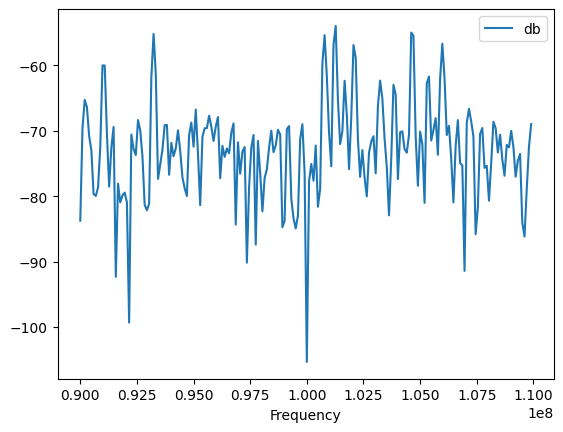

In [24]:
df.plot(x = 'Frequency', y = 'db')